In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo 
import plotly.io as pio
from plotly.offline import iplot
import altair as alt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\Tourist_Travel_Europe.csv')

In [3]:
df.head()

,Tourist_ID,Country_Visited,City_Visited,Mode_of_Travel,Travel_Duration_Days,Number_of_Companions,Total_Travel_Cost,Accommodation_Type,Main_Purpose,Season_of_Visit
0,1,Germany,Hamburg,Flight,8,4,1060,Hotel,Family Visit,Summer
1,2,Germany,Berlin,Car,16,3,3972,Hostel,Family Visit,Winter
2,3,UK,Manchester,Bicycle,8,2,666,Camping,Business,Winter
3,4,Greece,Thessaloniki,Bicycle,12,3,3644,Hotel,Business,Summer
4,5,Greece,Thessaloniki,Flight,5,3,1885,Airbnb,Leisure,Spring


In [4]:
df.columns = df.columns.str.replace(" ", "_")

In [5]:
def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summ['Missing#'] = df.isna().sum()
    summ['Missing%'] = (df.isna().sum())/len(df)
    summ['Dups'] = df.duplicated().sum()
    summ['Uniques'] = df.nunique().values
    summ['Count'] = df.count().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['Min'] = desc['min'].values
    summ['Max'] = desc['max'].values
    summ['Average'] = desc['mean'].values
    summ['Standard Deviation'] = desc['std'].values
    summ['First Value'] = df.loc[0].values
    summ['Second Value'] = df.loc[1].values
    summ['Third Value'] = df.loc[2].values

    display(summ)

summary(df)

data shape: (1000, 10)


,Data Type,Missing#,Missing%,Dups,Uniques,Count,Min,Max,Average,Standard Deviation,First Value,Second Value,Third Value
Tourist_ID,int64,0,0.0,0,1000,1000,1.0,1000.0,500.5,288.819436,1,2,3
Country_Visited,object,0,0.0,0,10,1000,NaN,NaN,NaN,NaN,Germany,Germany,UK
City_Visited,object,0,0.0,0,30,1000,NaN,NaN,NaN,NaN,Hamburg,Berlin,Manchester
Mode_of_Travel,object,0,0.0,0,5,1000,NaN,NaN,NaN,NaN,Flight,Car,Bicycle
Travel_Duration_Days,int64,0,0.0,0,19,1000,2.0,20.0,10.82,5.489785,8,16,8
Number_of_Companions,int64,0,0.0,0,5,1000,1.0,5.0,2.983,1.428549,4,3,2
Total_Travel_Cost,int64,0,0.0,0,900,1000,201.0,4999.0,2600.376,1393.394815,1060,3972,666
Accommodation_Type,object,0,0.0,0,4,1000,NaN,NaN,NaN,NaN,Hotel,Hostel,Camping
Main_Purpose,object,0,0.0,0,3,1000,NaN,NaN,NaN,NaN,Family Visit,Family Visit,Business
Season_of_Visit,object,0,0.0,0,4,1000,NaN,NaN,NaN,NaN,Summer,Winter,Winter


In [6]:
df.drop(["Tourist_ID"], axis=1, inplace = True)

In [7]:
df[['Number_of_Companions']] = df[['Number_of_Companions']].astype('str')

In [8]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    #del cat_cols[1] 
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 1000
Variables: 9
cat_cols: 6
num_cols: 2
cat_but_car: 1
num_but_cat: 0


In [9]:
cat_cols, num_cols, cat_but_car

(['Country_Visited',
  'Mode_of_Travel',
  'Number_of_Companions',
  'Accommodation_Type',
  'Main_Purpose',
  'Season_of_Visit'],
 ['Travel_Duration_Days', 'Total_Travel_Cost'],
 ['City_Visited'])

In [10]:
for i,col in enumerate(cat_cols):
    print(col, ':', df[col].unique(), "\n")

Country_Visited : ['Germany' 'UK' 'Greece' 'Portugal' 'Spain' 'Austria' 'Italy'
 'Netherlands' 'France' 'Switzerland'] 

Mode_of_Travel : ['Flight' 'Car' 'Bicycle' 'Bus' 'Train'] 

Number_of_Companions : ['4' '3' '2' '1' '5'] 

Accommodation_Type : ['Hotel' 'Hostel' 'Camping' 'Airbnb'] 

Main_Purpose : ['Family Visit' 'Business' 'Leisure'] 

Season_of_Visit : ['Summer' 'Winter' 'Spring' 'Fall'] 



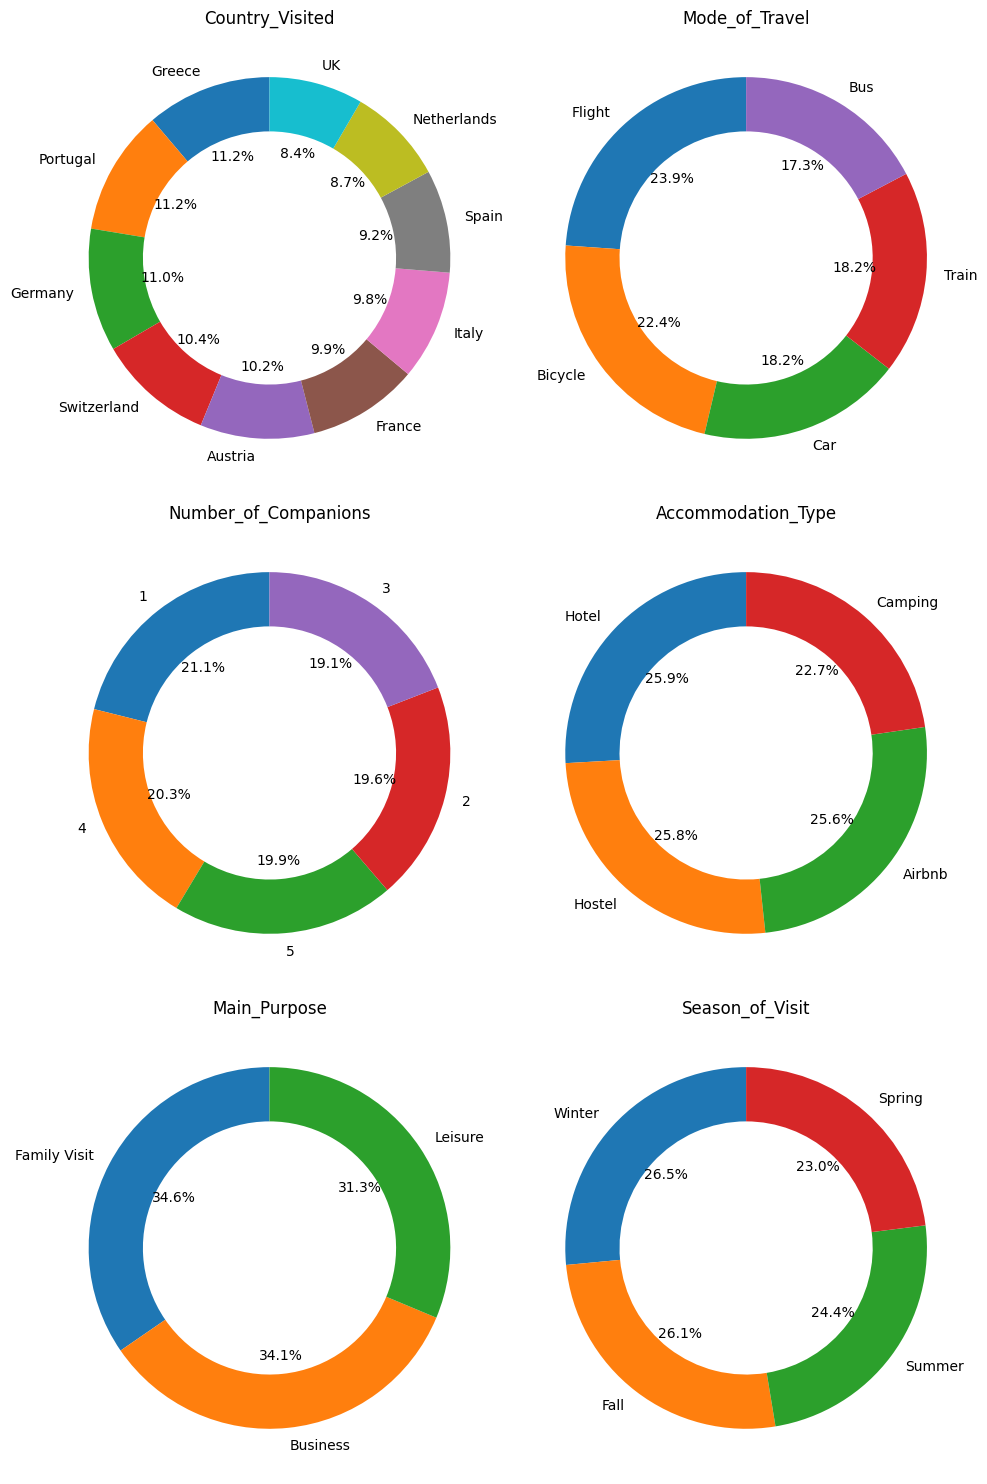

In [11]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))


for i, column in enumerate(cat_cols):
    row = i // 2  
    col = i % 2   
    ax = axes[row, col]
    category_counts = df[column].value_counts()
    ax.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90,
           wedgeprops={'width': 0.3})
    ax.set_title(column)

plt.tight_layout()
plt.show()

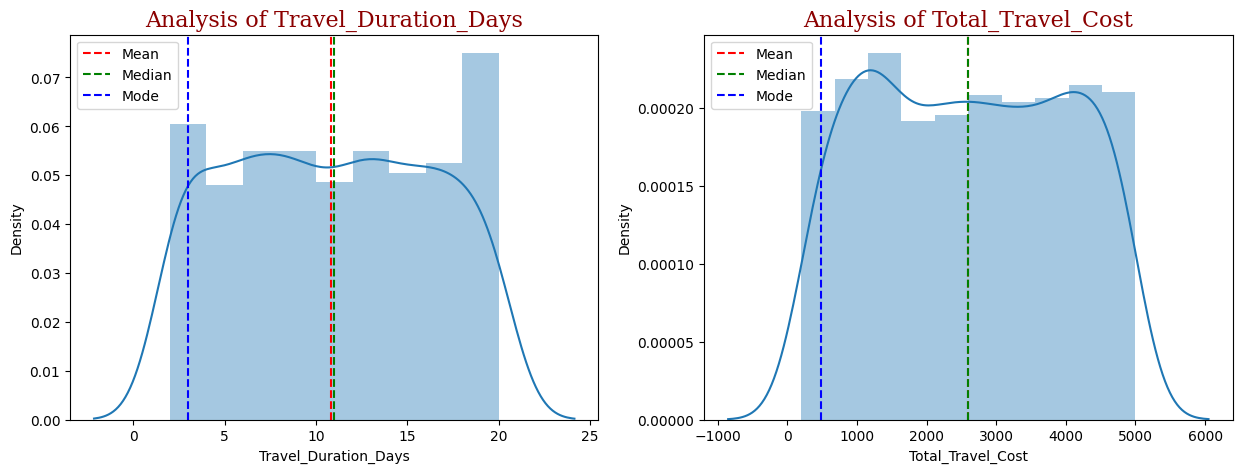

In [12]:
def generate_distribution_plot(df, num_cols):
    # create copy of dataframe
    data = df[num_cols].copy()
    # Create subplots 
    fig, axes = plt.subplots(nrows=len(data.columns)//2, ncols=2,figsize=(15,5))
    fig.subplots_adjust(hspace=0.7)
    
    # set fontdict
    font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
    
    # Generate distplot
    for ax, feature in zip(axes.flatten(), data.columns):
        feature_mean = data[feature].mean()
        feature_median = data[feature].median()
        feature_mode = data[feature].mode().values[0]
        sns.distplot(data[feature],ax=ax)
        ax.set_title(f'Analysis of {feature}', fontdict=font)
        ax.axvline(feature_mean, color='r', linestyle='--', label="Mean")
        ax.axvline(feature_median, color='g', linestyle='--', label="Median")
        ax.axvline(feature_mode, color='b', linestyle='--', label="Mode")
        ax.legend()
    plt.show()
    
generate_distribution_plot(df, num_cols)

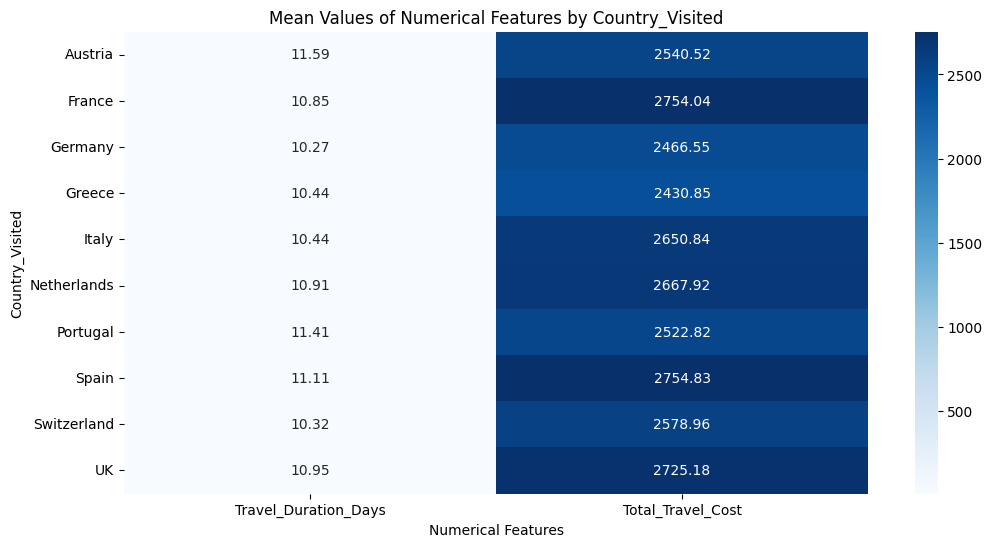

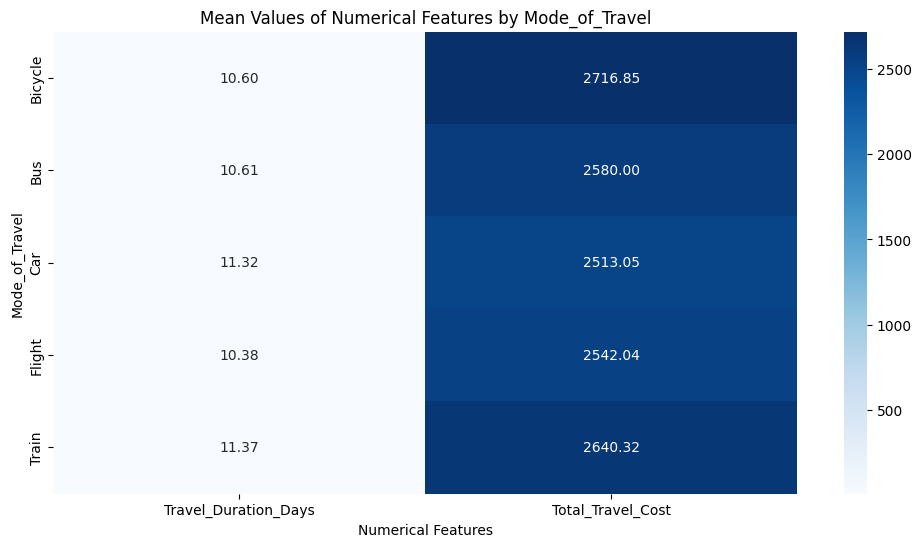

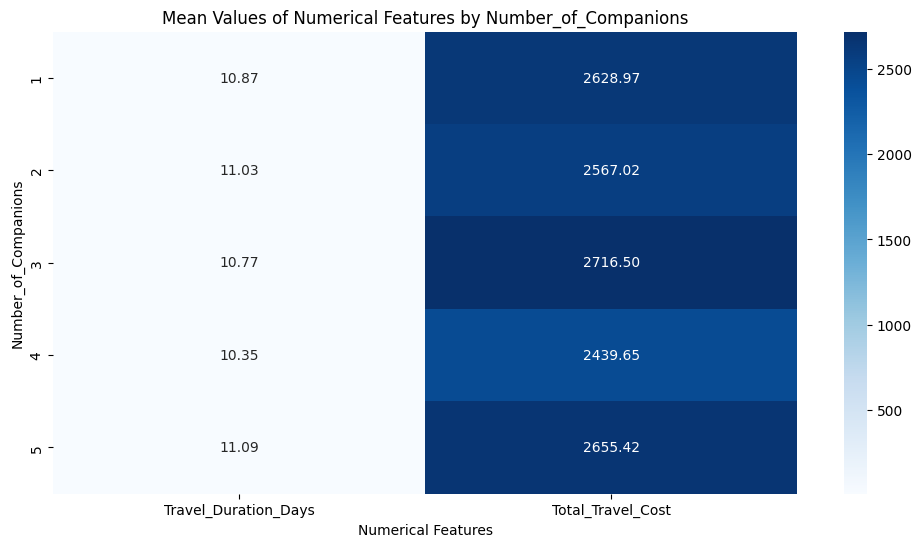

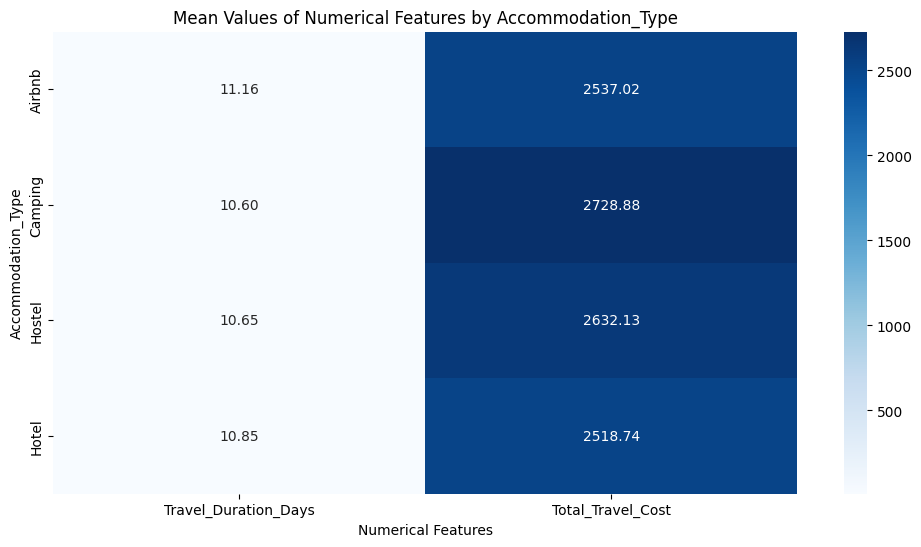

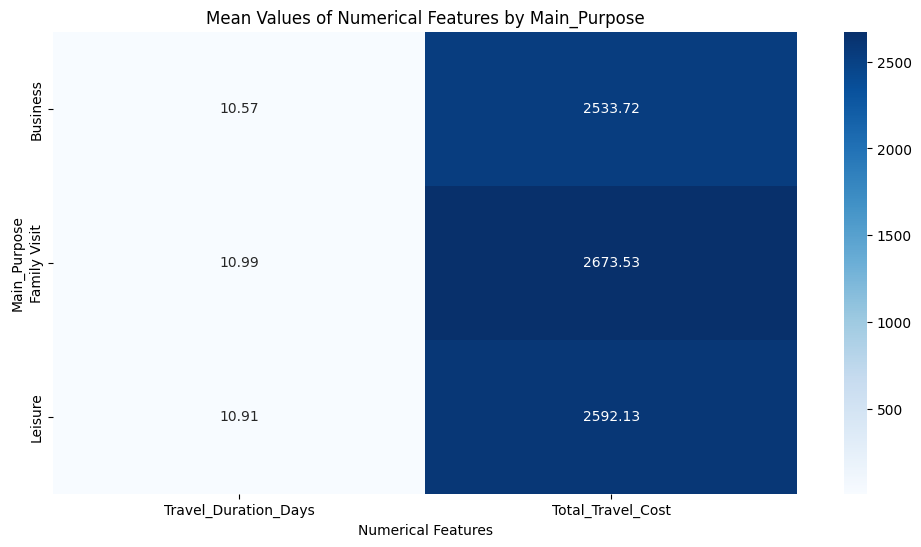

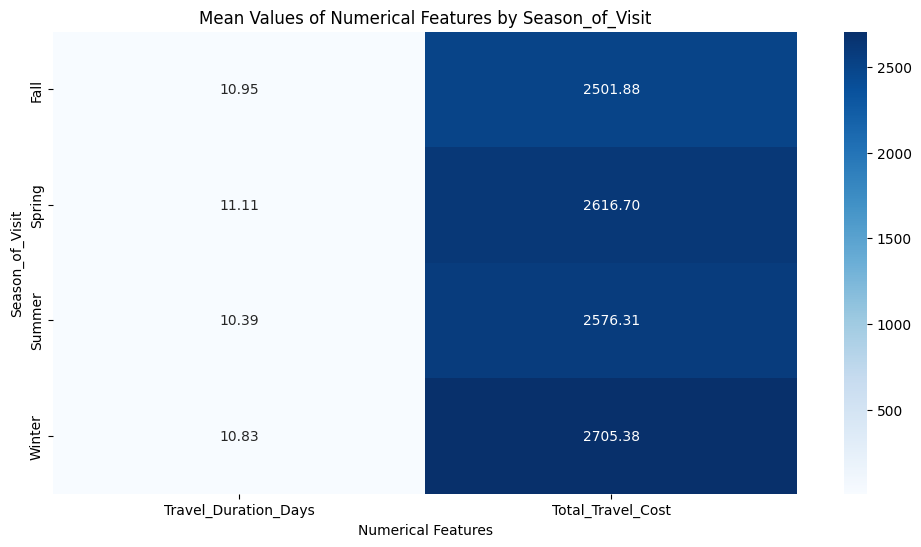

In [13]:
# Heatmap of means for numerical features grouped by a categorical variable
for cols in cat_cols:
    grouped_data = df.groupby(cols)[num_cols].mean()
    plt.figure(figsize=(12, 6))
    sns.heatmap(grouped_data, annot=True, fmt=".2f", cmap='Blues')
    plt.title(f'Mean Values of Numerical Features by {cols}')
    plt.ylabel(cols)
    plt.xlabel('Numerical Features')
    plt.show()

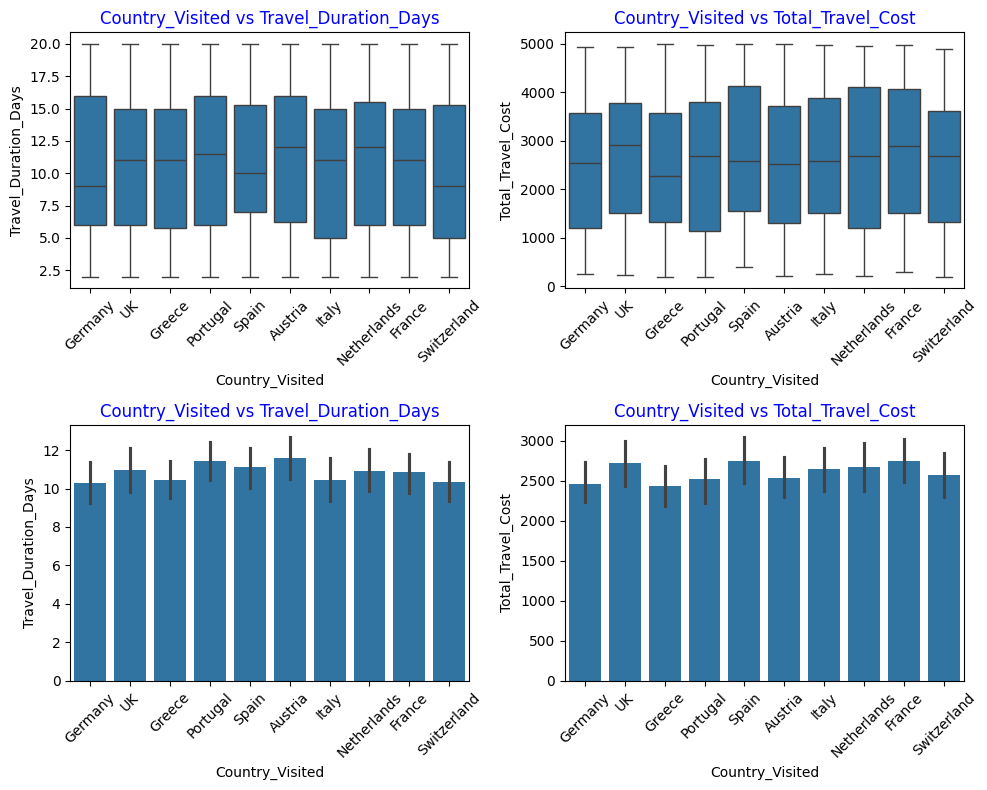

In [14]:
# Country_Visited
fig, axes = plt.subplots(2, 2, figsize=(10, 8)) 
axes = axes.ravel()

for idx, col in enumerate(num_cols):
    sns.boxplot(data=df, x="Country_Visited", y=col, ax=axes[idx])
    axes[idx].set_title(f'Country_Visited vs ' + col, color = 'blue')
    axes[idx].tick_params(axis='x', rotation=45, colors='black')
    sns.barplot(data=df, x="Country_Visited", y=col, ax=axes[idx+2])
    axes[idx+2].set_title(f'Country_Visited vs ' + col, color = 'blue')
    axes[idx+2].tick_params(axis='x', rotation=45, colors='black')
plt.tight_layout() 
plt.show()

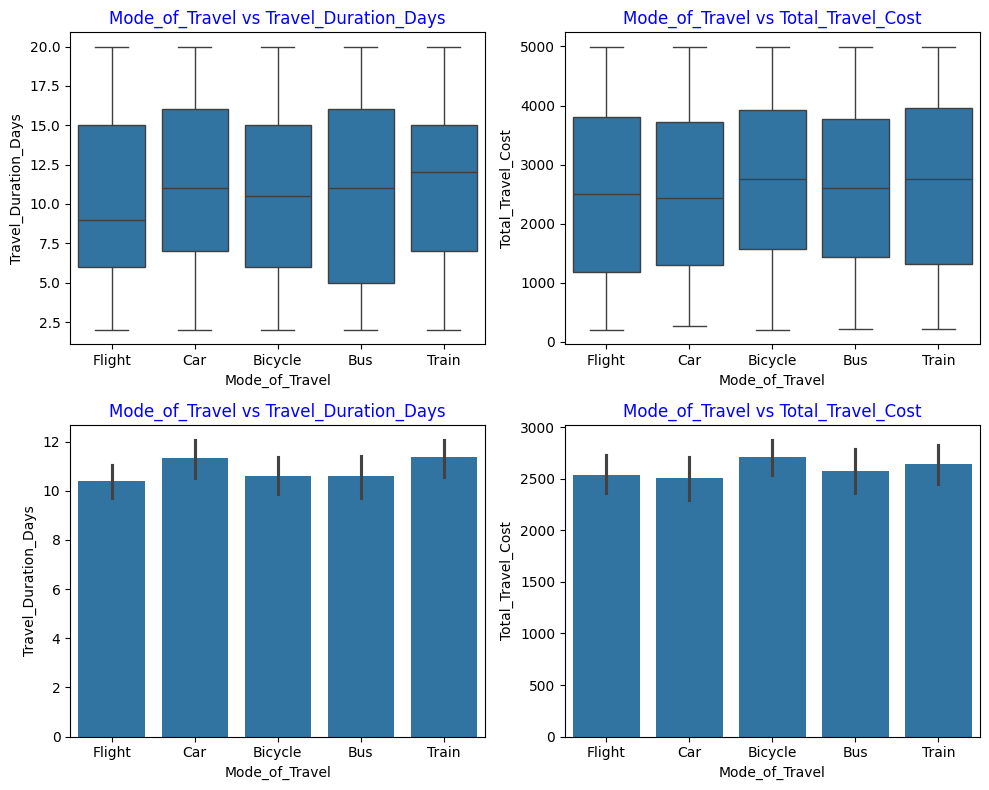

In [15]:
# Mode_of_Travel
fig, axes = plt.subplots(2, 2, figsize=(10, 8)) 
axes = axes.ravel()

for idx, col in enumerate(num_cols):
    sns.boxplot(data=df, x="Mode_of_Travel", y=col, ax=axes[idx])
    axes[idx].set_title(f'Mode_of_Travel vs ' + col, color = 'blue')
    sns.barplot(data=df, x="Mode_of_Travel", y=col, ax=axes[idx+2])
    axes[idx+2].set_title(f'Mode_of_Travel vs ' + col, color = 'blue')
plt.tight_layout() 
plt.show()

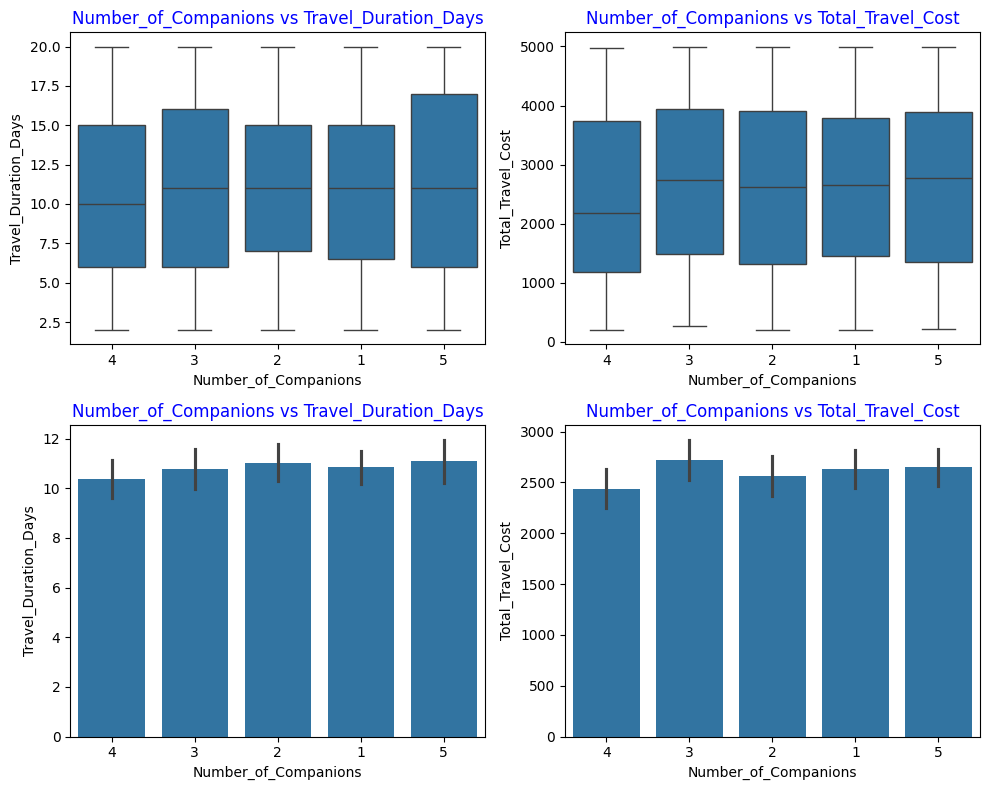

In [16]:
# Number_of_Companions
fig, axes = plt.subplots(2, 2, figsize=(10, 8)) 
axes = axes.ravel()

for idx, col in enumerate(num_cols):
    sns.boxplot(data=df, x="Number_of_Companions", y=col, ax=axes[idx])
    axes[idx].set_title(f'Number_of_Companions vs ' + col, color = 'blue')
    sns.barplot(data=df, x="Number_of_Companions", y=col, ax=axes[idx+2])
    axes[idx+2].set_title(f'Number_of_Companions vs ' + col, color = 'blue')
plt.tight_layout() 
plt.show()

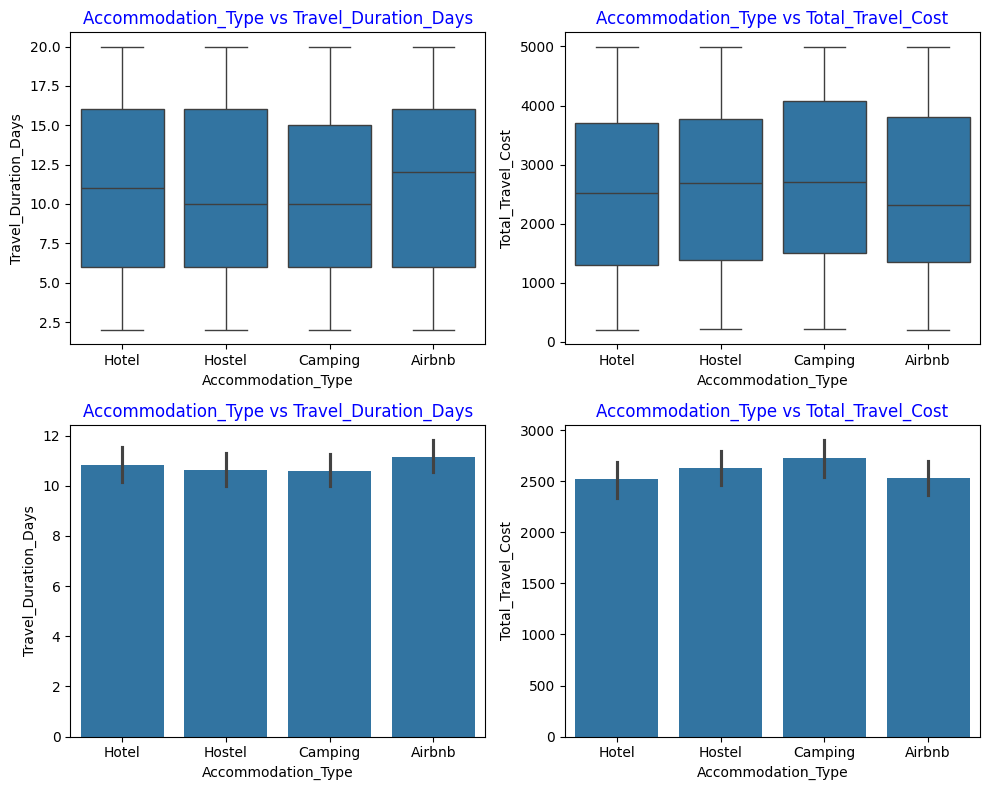

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8)) 
axes = axes.ravel()

for idx, col in enumerate(num_cols):
    sns.boxplot(data=df, x="Accommodation_Type", y=col, ax=axes[idx])
    axes[idx].set_title(f'Accommodation_Type vs ' + col, color = 'blue')
    sns.barplot(data=df, x="Accommodation_Type", y=col, ax=axes[idx+2])
    axes[idx+2].set_title(f'Accommodation_Type vs ' + col, color = 'blue')
plt.tight_layout() 
plt.show()

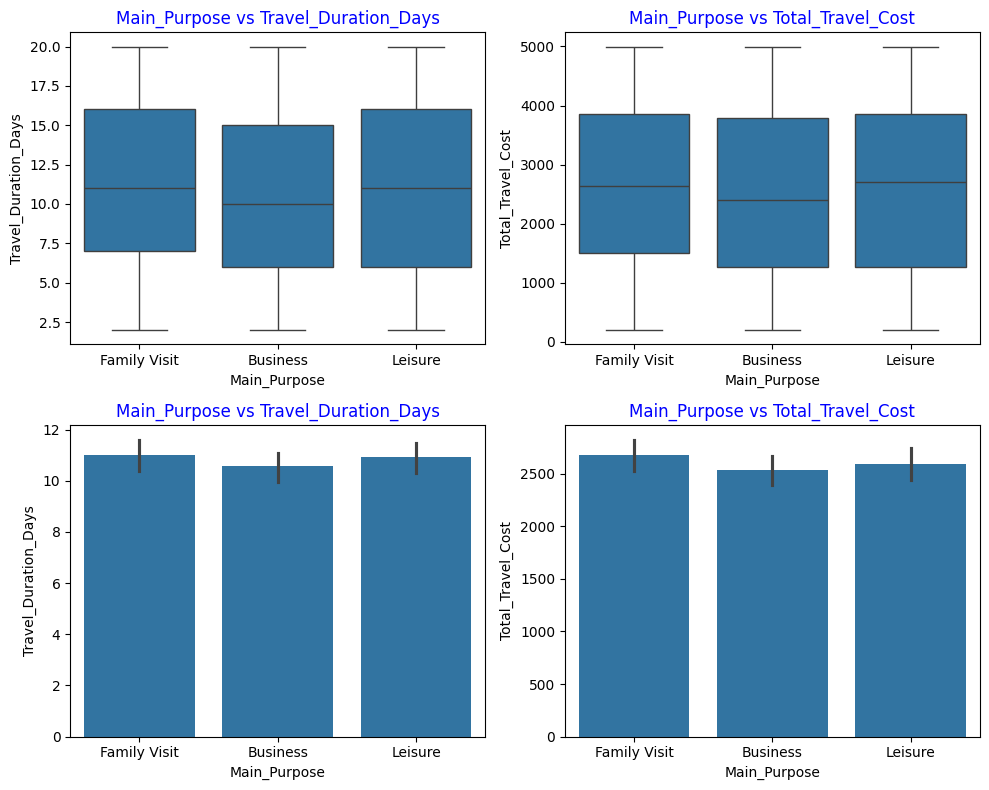

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8)) 
axes = axes.ravel()

for idx, col in enumerate(num_cols):
    sns.boxplot(data=df, x="Main_Purpose", y=col, ax=axes[idx])
    axes[idx].set_title(f'Main_Purpose vs ' + col, color = 'blue')
    sns.barplot(data=df, x="Main_Purpose", y=col, ax=axes[idx+2])
    axes[idx+2].set_title(f'Main_Purpose vs ' + col, color = 'blue')
plt.tight_layout() 
plt.show()

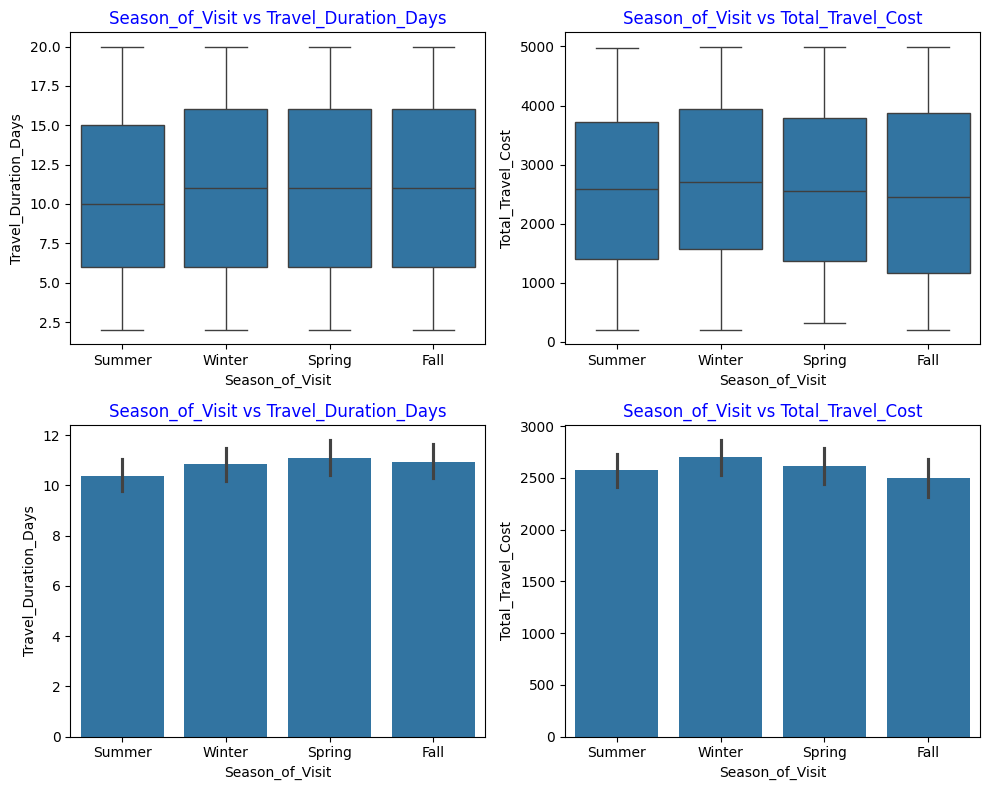

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8)) 
axes = axes.ravel()

for idx, col in enumerate(num_cols):
    sns.boxplot(data=df, x="Season_of_Visit", y=col, ax=axes[idx])
    axes[idx].set_title(f'Season_of_Visit vs ' + col, color = 'blue')
    sns.barplot(data=df, x="Season_of_Visit", y=col, ax=axes[idx+2])
    axes[idx+2].set_title(f'Season_of_Visit vs ' + col, color = 'blue')
plt.tight_layout() 
plt.show()

In [20]:
for i in cat_cols:
    t_table = pd.crosstab(df['City_Visited'], df[i])

    data = t_table.reset_index()
    data = data.rename(columns={'City_Visited': 'City'})
    data = data.melt(id_vars='City', var_name=i, value_name='Count')

    chart = alt.Chart(data).mark_bar().encode(
        x='City:N',
        y='Count:Q',
        color=i,
        tooltip=['City:N', i, 'Count:Q']
    ).properties(
        width=300,
        height=200
    ).facet(
        column=i,
        columns=5
    ).resolve_scale(
        x='independent',
    y='independent'
    )

    chart.display()

alt.FacetChart(...)

alt.FacetChart(...)

alt.FacetChart(...)

alt.FacetChart(...)

alt.FacetChart(...)

alt.FacetChart(...)

In [21]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
   
    original_values = df[column].unique()
    
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])
   
    encoded_values = df[column].unique()
    
    decoded_values = label_encoders[column].inverse_transform(encoded_values)
    

    print(f"\n{column} Encoding and Decoding:")
    for enc, dec in zip(encoded_values, decoded_values):
        print(f"{enc} -> {dec}")


Country_Visited Encoding and Decoding:
2 -> Germany
9 -> UK
3 -> Greece
6 -> Portugal
7 -> Spain
0 -> Austria
4 -> Italy
5 -> Netherlands
1 -> France
8 -> Switzerland

City_Visited Encoding and Decoding:
7 -> Hamburg
3 -> Berlin
14 -> Manchester
25 -> Thessaloniki
1 -> Athens
9 -> Lisbon
5 -> Faro
13 -> Madrid
22 -> Salzburg
10 -> London
20 -> Rome
26 -> Utrecht
18 -> Paris
11 -> Lucerne
19 -> Porto
12 -> Lyon
4 -> Edinburgh
24 -> Seville
21 -> Rotterdam
28 -> Vienna
23 -> Santorini
8 -> Innsbruck
2 -> Barcelona
29 -> Zurich
17 -> Nice
6 -> Geneva
0 -> Amsterdam
27 -> Venice
15 -> Milan
16 -> Munich

Mode_of_Travel Encoding and Decoding:
3 -> Flight
2 -> Car
0 -> Bicycle
1 -> Bus
4 -> Train

Number_of_Companions Encoding and Decoding:
3 -> 4
2 -> 3
1 -> 2
0 -> 1
4 -> 5

Accommodation_Type Encoding and Decoding:
3 -> Hotel
2 -> Hostel
1 -> Camping
0 -> Airbnb

Main_Purpose Encoding and Decoding:
1 -> Family Visit
0 -> Business
2 -> Leisure

Season_of_Visit Encoding and Decoding:
2 -> S

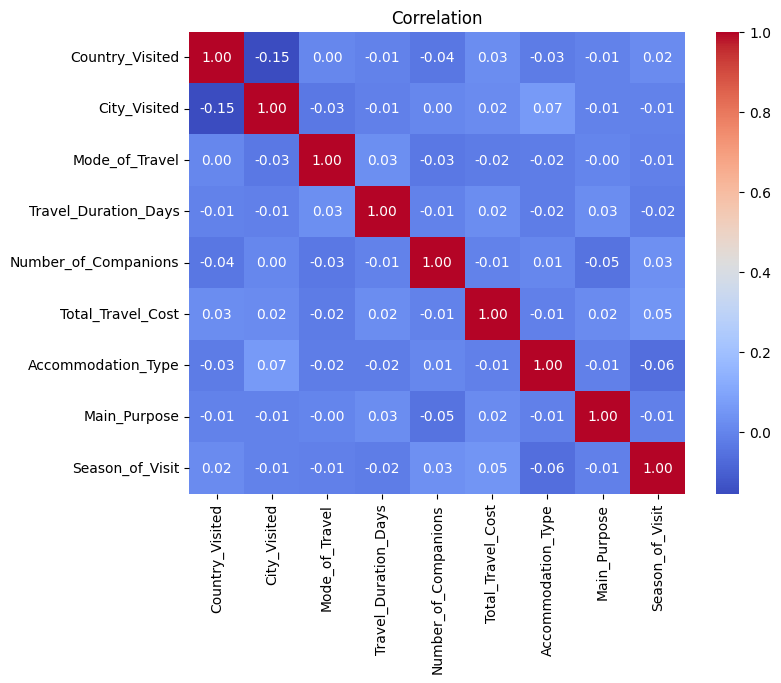

In [22]:
plt.figure(figsize=(8, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation")
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Prepare data for modeling
X = df[['Travel_Duration_Days', 'Number_of_Companions', 'Total_Travel_Cost']]
y = df['Mode_of_Travel']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy, conf_matrix

(0.23,
 array([[18,  5,  6,  9,  9],
        [10,  3,  7,  6, 10],
        [12,  6,  9,  7,  5],
        [11,  4,  7, 10,  8],
        [12, 10,  3,  7,  6]], dtype=int64))

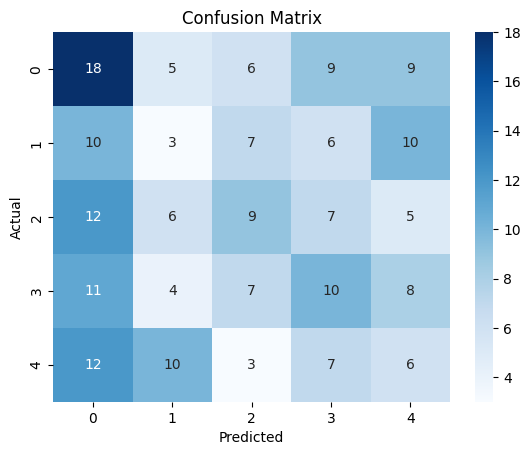

In [24]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()